# Gutenberg fiction topic modeling: 

expand contractions
Lemma
TFIDF-countvectorizer
NMF
KMeans clustering

In [6]:
import pandas as pd
import numpy as np

import sklearn.feature_extraction.text as text
from sklearn import decomposition

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import nltk
from nltk.tokenize import wordpunct_tokenize

In [41]:
pickloader = open("books_df.pkl","rb")
books_df = pickle.load(pickloader)
pickloader.close()

# pickloader = open("books_list.pkl","rb")
# clean_books = pickle.load(pickloader)
# pickloader.close()

pickloader = open("book_titles.pkl","rb")
titles = pickle.load(pickloader)
pickloader.close()

pickloader = open("book_authors.pkl","rb")
authors = pickle.load(pickloader)
pickloader.close()

### Removing contractions:

In [971]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

expandContractions(clean_books[0].lower())

clean_books_expanded = [expandContractions(book.lower()) for book in clean_books]

clean_books = clean_books_expanded

### Stemming/Lemming:

**Stemming** usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

**Lemmatization** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma 

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [ ]:
# # Stemming: more aggressive

# stem_books = []
# for book in clean_books:
#     stem_book = [stemmer.stem(word) for word in wordpunct_tokenize(book)]
#     stem_book = (' ').join(stem_book)
#     stem_books.append(stem_book)

In [ ]:
# Lemming: a gentler approach: 
lemma=nltk.stem.WordNetLemmatizer()

lemma_books = []
for book in clean_books:
    lemma_book = [lemma.lemmatize(word) for word in wordpunct_tokenize(book)]
    lemma_book = (' ').join(lemma_book)
    lemma_books.append(lemma_book)

In [ ]:
clean_books = lemma_books

### Pickle/unpickle lemmatized books:

In [ ]:
# pickle:
pickle.dump( clean_books, open( "lemmed_books.pkl", "wb" ) )

In [7]:
# unpickle:
clean_books = pickle.load(open( "lemmed_books.pkl", "rb" ) )

In [38]:
len(clean_books)

3524

### Vectorizing:

In [9]:
from sklearn.feature_extraction import text

extra_stop_words=[]
my_stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

ngrams=1

#max_df set to range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency
#raise min_df to get rid of weird words or use max_features: int to take top frequent words
                  
vectorizer = text.TfidfVectorizer(stop_words=my_stop_words, ngram_range=(1,ngrams), min_df=.05, max_df=.9, max_features=12000 , token_pattern="\\b[a-z][a-z]+\\b")
#note this takes care of lowercase, punctuation stop words all in one go

#document term matrix (dtm)
dtm = vectorizer.fit_transform(clean_books).toarray()

vocab = np.array(vectorizer.get_feature_names())

In [10]:
vocab[999:1099]

array(['bestow', 'bestowed', 'bestowing', 'bet', 'bethought', 'betokened',
       'betook', 'betray', 'betrayed', 'betraying', 'betrothed', 'betty',
       'betwixt', 'beverage', 'beware', 'bewildered', 'bewildering',
       'bewilderment', 'bewitched', 'bible', 'bicycle', 'bid', 'bidden',
       'bidding', 'bide', 'bier', 'big', 'bigger', 'biggest', 'billet',
       'billion', 'billow', 'billy', 'bin', 'bind', 'binding',
       'biography', 'birch', 'bird', 'birth', 'birthday', 'biscuit',
       'bishop', 'bit', 'bite', 'biting', 'bitten', 'bitter', 'bitterest',
       'bitterly', 'bitterness', 'black', 'blackbird', 'blackened',
       'blacker', 'blackguard', 'blackness', 'blacksmith', 'blade',
       'blame', 'blamed', 'bland', 'blandly', 'blank', 'blanket',
       'blankly', 'blasphemy', 'blast', 'blasted', 'blasting', 'blaze',
       'blazed', 'blazing', 'bleak', 'bled', 'bleed', 'bleeding',
       'blended', 'bless', 'blessed', 'blessing', 'blest', 'blew',
       'blind', 'blinde

In [228]:
from scipy import spatial
test = spatial.distance.cosine(
            NMFmodel.components_[0], NMFmodel.components_[6])
print(test)

0.6097645275939678


In [213]:
#min, max, # of vocab words
#.15, .75 = 6316
#.1 .9 = 9111
#.05 .75 = 13958
#.05 .8 = 14070
#0.05, 0.85 = 14175
#.025 .9 = 20000
#.1 .85 = 9056
#.08 .80 = 10550
#.07 .90 = 11612
len(vocab) 

12000

In [214]:
dtm.shape

(3524, 12000)

In [215]:
pickler = open("dtm.pkl","wb")
pickle.dump(dtm, pickler)
pickler.close()

pickler = open("vocab.pkl","wb")
pickle.dump(vocab, pickler)
pickler.close()

### Modeling:

In [290]:
num_topics = 15
NMFmodel = decomposition.NMF(n_components=num_topics, random_state=42)
doctopic = NMFmodel.fit_transform(dtm)

In [217]:
pickler = open("doctopic.pkl","wb")
pickle.dump(doctopic, pickler)
pickler.close()

In [209]:
doctopic.shape

(3524, 15)

In [216]:
# this weights the topics per document:
doctopic = np.nan_to_num(doctopic)
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

In [291]:
# make a list of the topic words for each topic
num_top_words = 30
topic_words = []
word_weights = []
for topic in NMFmodel.components_:
#     topic = NMFmodel.components_[j]
#     print(len(word_idx),word_idx)
#     print(len([NMFmodel.components_[j][i] for i in word_idx]),[NMFmodel.components_[j][i] for i in word_idx])
#     print(len([topic[i] for i in word_idx]),[topic[i] for i in word_idx])
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])
    word_weights.append([topic[i] for i in word_idx])

In [219]:
pickler = open("topicsdf.pkl","wb")
pickle.dump(topicsdf, pickler)
pickler.close()

pickler = open("topics.pkl","wb")
pickle.dump(topics, pickler)
pickler.close()

In [292]:
topicsdf = pd.DataFrame()
topicsdf['topic_num'] = list(range(len(NMFmodel.components_)))
topicsdf['topic_words'] = topic_words
topicsdf['word_weights'] = word_weights
topicsdf.topic_words

0     [woman, love, heart, father, friend, house, yo...
1     [thou, thy, thee, earl, hath, lord, king, god,...
2     [mr, miss, room, yes, house, george, sir, mone...
3     [illustration, book, picture, mouse, cat, dog,...
4     [sir, knight, colonel, ye, lord, horse, lady, ...
5     [tom, ned, airship, inventor, harry, sam, scou...
6     [planet, ship, earth, space, room, martian, ma...
7     [captain, ship, boat, sea, deck, vessel, pirat...
8     [king, prince, princess, queen, palace, son, f...
9     [water, tree, indian, river, night, white, mou...
10    [state, war, american, government, general, co...
11    [child, mother, girl, boy, oh, father, home, a...
12    [jack, frank, boy, ned, professor, submarine, ...
13    [dick, sam, rover, boy, fred, joe, dan, bob, a...
14    [betty, girl, grace, ruth, polly, anne, miss, ...
Name: topic_words, dtype: object

In [293]:
topics = NMFmodel.components_

In [316]:
topicsdf.word_weights[0]

[0.7300662721973648,
 0.5577033137931597,
 0.5496062483689399,
 0.47245631870073557,
 0.46184959341680293,
 0.4498030775016047,
 0.4473688486635536,
 0.4411003309692891,
 0.3893845099538635,
 0.38904952312436186,
 0.3599549067997929,
 0.342144064277967,
 0.33971384251928705,
 0.3282222665777863,
 0.3034613366054845,
 0.2931100070478624,
 0.2922931737085483,
 0.2904267865321413,
 0.28876189480907594,
 0.2774660821254622,
 0.27312867352926445,
 0.272357591760483,
 0.2709334710165402,
 0.26118461312656555,
 0.25996263555575727,
 0.25313799248173996,
 0.2495611854967727,
 0.2444555283467502,
 0.24131035574856347,
 0.2367160589985148]

In [476]:
doctopic[3523]

array([3.03319987e-03, 0.00000000e+00, 6.88715966e-02, 0.00000000e+00,
       2.22531420e-02, 0.00000000e+00, 3.52907255e-02, 9.80113501e-05,
       0.00000000e+00, 0.00000000e+00, 1.92838043e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

### Showing the top words for each topic

In [314]:
for t in range(len(topic_words)):
    print("Topic {}: {} ({})".format(t,topic_names[t],' '.join(topic_words[t][:12])))

Topic 0: Relationships (woman love heart father friend house young god shall room madame child)
Topic 1: Anglo-Saxon/Old English (thou thy thee earl hath lord king god hast ye shall knight)
Topic 2: Investigations/Mysteries (mr miss room yes house george sir money peter gentleman paper dollar)
Topic 3: Children Stories (illustration book picture mouse cat dog robin cock bird pig frederick pussy)
Topic 4: Military (sir knight colonel ye lord horse lady officer harry shall general arthur)
Topic 5: Aviation (tom ned airship inventor harry sam scout roger swift boy mr cadet)
Topic 6: Sci-Fi (planet ship earth space room martian machine control maybe dr rocket mar)
Topic 7: Sailing/Pirates (captain ship boat sea deck vessel pirate crew island board water sail)
Topic 8: Fantasy (king prince princess queen palace son fairy sword brother majesty shall daughter)
Topic 9: Nature (water tree indian river night white mountain rock animal forest black canoe)
Topic 10: Politics (state war american g

In [734]:
topic_names = [
    'Relationships',
    'Anglo-Saxon',
    'Mysteries',
    'Children Stories',
    'Military',
    'Aviation',
    'Sci-Fi',
    'Sailing/Pirates',
    'Fantasy',
    'Nature',
    'Politics',
    'Family',
    'Nautical',
    'Men',
    'Women']

In [318]:
topic_words[8][:10]

['king',
 'prince',
 'princess',
 'queen',
 'palace',
 'son',
 'fairy',
 'sword',
 'brother',
 'majesty']

In [672]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15,10]
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 24
mpl.rcParams['font.style'] = 'normal'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['figure.titlesize'] = 'x-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titlesize'] = 'x-large'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['font.monospace'] = 'monospace'

In [380]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'a

In [511]:
plt.style.use(plt.style.available[25])

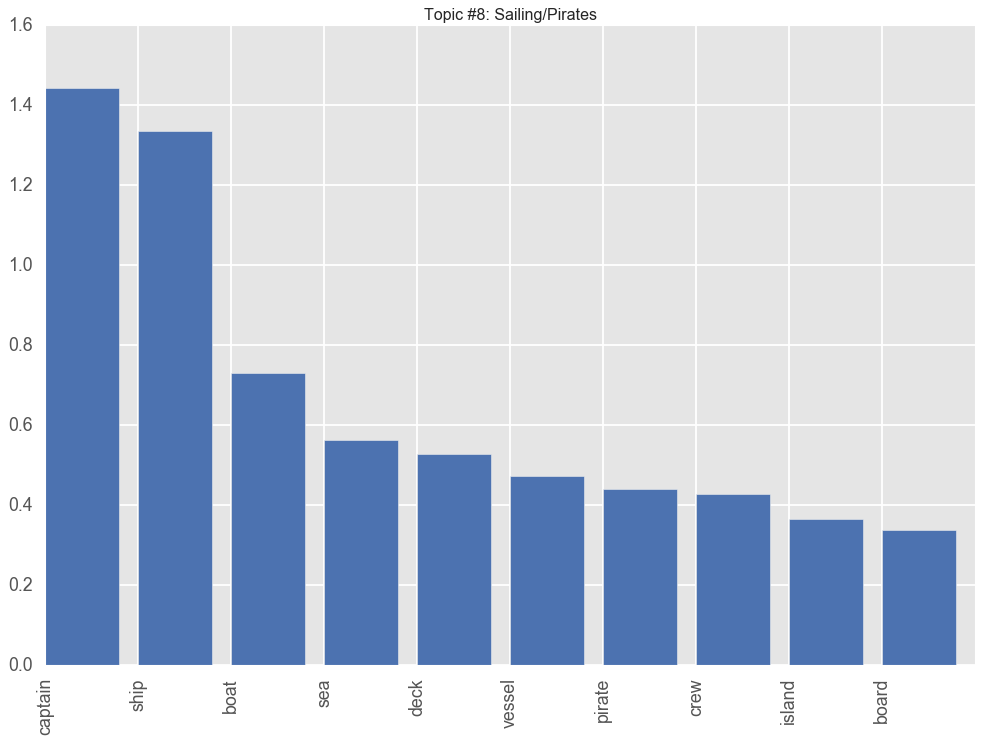

In [512]:
plt.figure(figsize=(15,10))

i = 7 #choose topic
j = 10 #num of words / bars

y_pos = np.arange(j)
y = topicsdf.word_weights[i][:j]

plt.bar(y_pos, y)

plt.xticks(y_pos, topic_words[i][:j], rotation=90)
plt.title('Topic #'+str(i+1)+': '+topic_names[i])

plt.show()

In [510]:
doctopic

array([[0.00058737, 0.        , 0.00469965, ..., 0.        , 0.        ,
        0.02888025],
       [0.        , 0.        , 0.00295802, ..., 0.        , 0.        ,
        0.0294013 ],
       [0.03999334, 0.00259059, 0.00642716, ..., 0.00155173, 0.00010362,
        0.00109691],
       ...,
       [0.01121145, 0.        , 0.02247763, ..., 0.00936972, 0.00952383,
        0.00706373],
       [0.01010287, 0.        , 0.        , ..., 0.        , 0.00814466,
        0.00529183],
       [0.0030332 , 0.        , 0.0688716 , ..., 0.        , 0.        ,
        0.        ]])

### Clustering:

In [27]:
from sklearn.cluster import KMeans

In [892]:
clustering = KMeans(n_clusters=15, random_state = 42)
clusters = clustering.fit_predict(doctopic)

In [893]:
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [894]:
titles = books_df['title']
titles = list(titles)

In [895]:
len(titles)

3524

In [884]:
pickler = open("book_titles.pkl","wb")
pickle.dump(titles, pickler)
pickler.close()

In [896]:
book_clusters = pd.DataFrame()
book_clusters['title'] = titles
book_clusters['cluster'] = clusters
book_clusters.head(60)

,title,cluster
0,Alice's Adventures in Wonderland,1
1,Through the Looking-Glass,1
2,The Hunting of the Snark: An Agony in Eight Fits,1
3,Moby Dick,7
4,The Song of Hiawatha,10
5,The Time Machine,10
6,The War of the Worlds,10
7,The Legend of Sleepy Hollow,10
8,The Strange Case of Dr. Jekyll and Mr. Hyde,2
9,Anne of Green Gables,5


In [897]:
#list books in a cluster
list(book_clusters[book_clusters['cluster']==14]['title'])

["Grace Harlowe's Senior Year at High School",
 "Ruth Fielding of the Red Mill; Or, Jasper Parloe's Secret",
 'The Outdoor Girls at Rainbow Lake; Or, The Stirring Cruise of the Motor Boat Gem',
 'The Outdoor Girls at Wild Rose Lodge; Or, The Hermit of Moonlight Falls',
 'The Girl Scout Pioneers; Or, Winning the First B. C.',
 'Further Chronicles of Avonlea',
 'Ruth Fielding at Snow Camp; Or, Lost in the Backwoods',
 'Betty Gordon in Washington; Or, Strange Adventures in a Great City',
 "Grace Harlowe's Second Year at Overton College",
 'Dorothy Dainty at Glenmore',
 'The Outdoor Girls in Army Service; Or, Doing Their Bit for the Soldier Boys',
 'The Outdoor Girls at Wild Rose Lodge; or, the Hermit of Moonlight Falls',
 'The Camp Fire Girls at Sunrise Hill',
 "Grace Harlowe's Return to Overton Campus",
 'Betty Gordon at Boarding School; Or, The Treasure of Indian Chasm',
 'The Outdoor Girls of Deepdale; Or, camping and tramping for fun and health',
 'The Outdoor Girls at the Hostess Hou

In [899]:
# find cluster of a particular book:
booktitle="Metamorphosis"
cluster_num = list(book_clusters[book_clusters['title']==booktitle]['cluster'])[0]
print(cluster_num)
#list(book_clusters[book_clusters['cluster']==cluster_num]['book'])

1


### PCA:

In [548]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2, random_state=0)
#Project the data in 2D

PCAxy = PCA.fit_transform(doctopic)
PCAxy.shape

(3524, 2)

In [579]:
len(clusters)

3524

In [756]:
PCAxy

array([[ 0.00149471,  0.00566431],
       [ 0.00746348,  0.00701811],
       [ 0.00190583, -0.01476106],
       ...,
       [-0.02156063, -0.02544312],
       [-0.01049697, -0.02109644],
       [-0.0281277 ,  0.00261473]])

/Users/clarencestephen/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



<Figure size 1000x750 with 0 Axes>

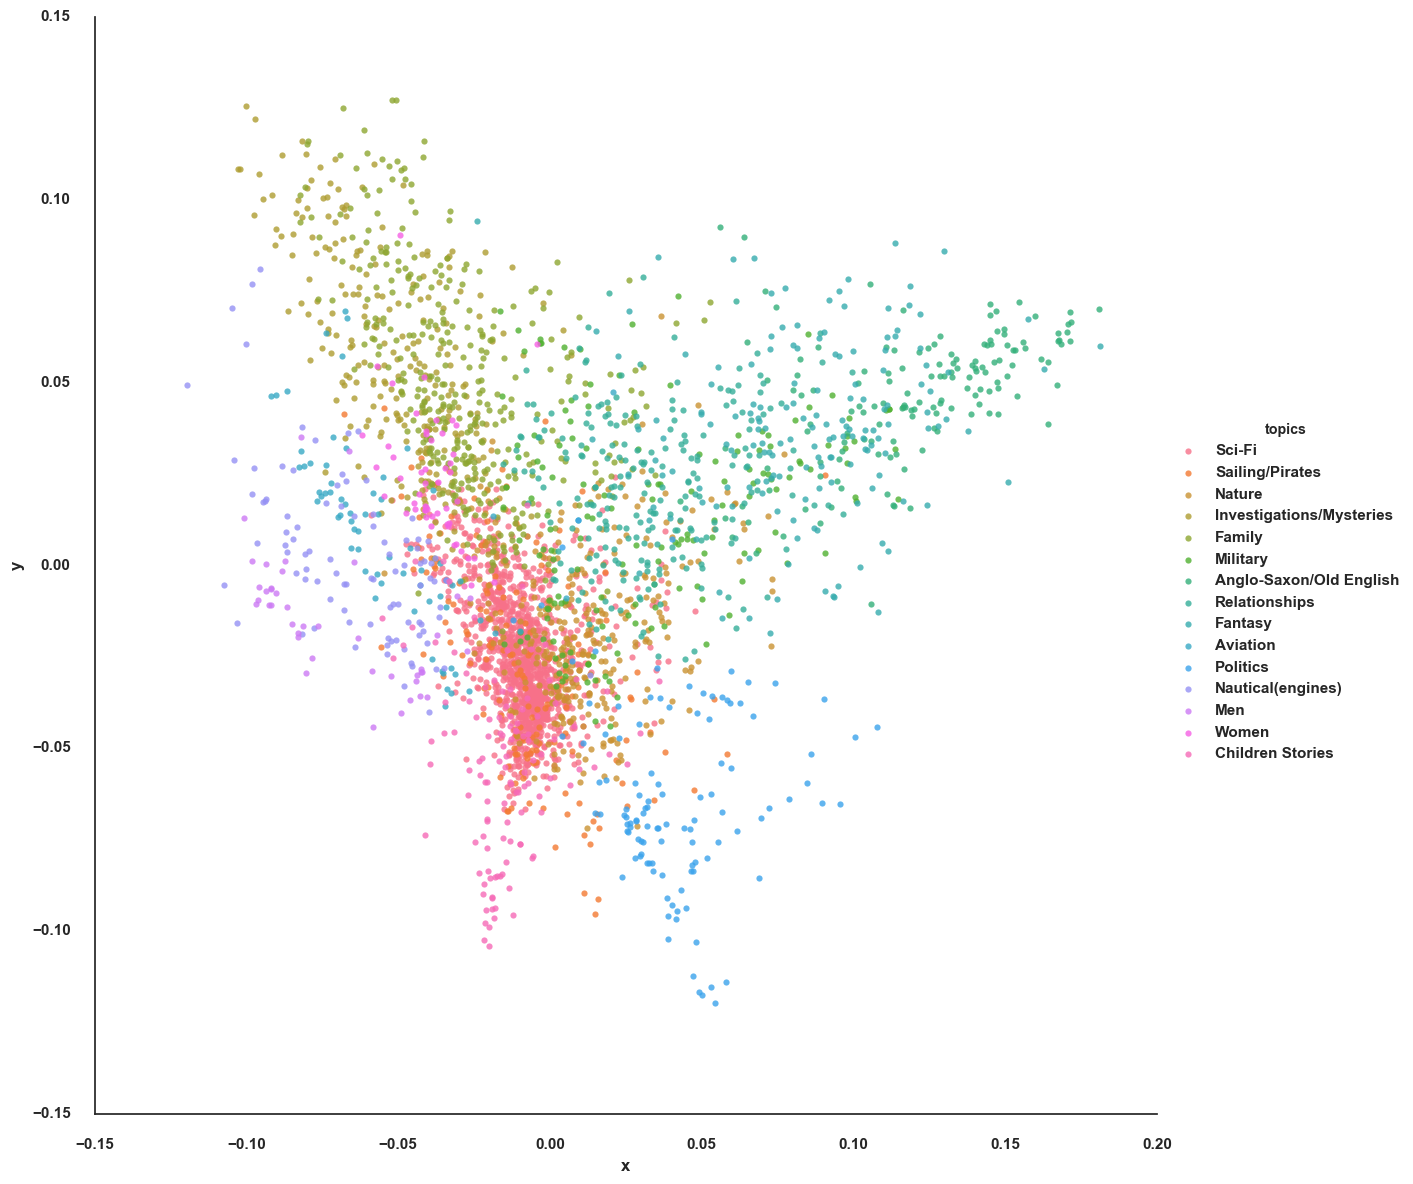

In [794]:
#Visualize the data

plt.figure(figsize=(10,7.5))

data = pd.DataFrame()
data['x']=PCAxy.T[0]
data['y']=PCAxy.T[1]
data['topics']=topic_array

facet = sns.lmplot(data=data, x='x', y='y', hue='topics', 
                   fit_reg=False, legend=True, legend_out=True, size=12, aspect=1)

plt.show()

In [749]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

/Users/clarencestephen/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



In [759]:
list(topic_array)

['Sci-Fi',
 'Sci-Fi',
 'Sci-Fi',
 'Sailing/Pirates',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Family',
 'Family',
 'Family',
 'Sci-Fi',
 'Nature',
 'Military',
 'Nature',
 'Sci-Fi',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Anglo-Saxon/Old English',
 'Sci-Fi',
 'Relationships',
 'Nature',
 'Military',
 'Nature',
 'Nature',
 'Fantasy',
 'Nature',
 'Relationships',
 'Investigations/Mysteries',
 'Investigations/Mysteries',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Sailing/Pirates',
 'Investigations/Mysteries',
 'Nature',
 'Sci-Fi',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Nature',
 'Investigations/Mysteries',
 'Nature',
 'Family',
 'Sailing/Pirates',
 'Anglo-Saxon/Old English',
 'Sci-Fi',
 'Relationships',
 'Relationships',
 'Relationships',
 'Relationships',
 'Investigations/Mysteries',
 'Nature',
 'Relationships',
 'Family',
 'Anglo-Saxon/Old English',
 'Nature',
 'Relationships',
 'Family',
 'Relationshi

In [797]:
book_clusters.head()

,book,cluster
0,Alice's Adventures in Wonderland,1
1,Through the Looking-Glass,1
2,The Hunting of the Snark: An Agony in Eight Fits,1
3,Moby Dick,5
4,The Song of Hiawatha,4


In [777]:
colors = ['aliceblue','aqua','aquamarine', 'azure', 'blue', 'blueviolet','cadetblue','cornflowerblue','crimson', 'cyan', 'darkblue', 'darkcyan','darkgoldenrod', 'darkgrey', 'darkgreen']
#             darkkhaki, darkmagenta, darkolivegreen, darkorange,
#             darkorchid, darkred, darksalmon, darkseagreen,
#             darkslateblue, darkslategray, darkslategrey,
#             darkturquoise, darkviolet, deeppink, deepskyblue,
#             dimgray, dimgrey, dodgerblue, firebrick,
#             floralwhite, forestgreen, fuchsia, gainsboro,
#             ghostwhite, gold, goldenrod, gray, grey, green,
#             greenyellow, honeydew, hotpink, indianred, indigo,
#             ivory, khaki, lavender, lavenderblush, lawngreen,
#             lemonchiffon, lightblue, lightcoral, lightcyan,
#             lightgoldenrodyellow, lightgray, lightgrey,
#             lightgreen, lightpink, lightsalmon, lightseagreen,
#             lightskyblue, lightslategray, lightslategrey,
#             lightsteelblue, lightyellow, lime, limegreen,
#             linen, magenta, maroon, mediumaquamarine,
#             mediumblue, mediumorchid, mediumpurple,
#             mediumseagreen, mediumslateblue, mediumspringgreen,
#             mediumturquoise, mediumvioletred, midnightbl

In [792]:
trace0 = go.Scatter(
    x = PCAxy.T[0],
    y = PCAxy.T[1],
    name = "testing",
    #hoveron = "testing",
    mode = 'markers',
    text = topic_array,
    showlegend = True,
    marker = dict(
        size = 8,
        cmax=14,
        cmin=0,
        color = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        colorscale ='Viridis',
        showscale = False,
        line = dict(
           width = 2,
            color = 'rgb(0, 0, 0)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = dict(title = 'PCA (Principal Component Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [905]:
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [906]:
#lets make some tableau csv
PCA_df = pd.DataFrame()
PCA_df['x_pca']= PCAxy.T[0]
PCA_df['y_pca'] = PCAxy.T[1]
PCA_df['x_tsne'] = X_tsne.T[0]
PCA_df['y_tsne'] = X_tsne.T[1]
PCA_df['title'] = titles
PCA_df['clusters']= clusters
PCA_df['topic']= topic_names_list
PCA_df.head()

,x_pca,y_pca,x_tsne,y_tsne,title,clusters,topic
0,0.001495,0.005664,-47.495491,-5.140392,Alice's Adventures in Wonderland,1,Family
1,0.007463,0.007018,-47.490540,-5.170099,Through the Looking-Glass,1,Fantasy
2,0.001906,-0.014761,-9.604569,-22.213722,The Hunting of the Snark: An Agony in Eight Fits,1,Relationships
3,-0.008563,-0.030808,5.146376,-7.213932,Moby Dick,7,Sailing/Pirates
4,0.033901,-0.009385,13.349816,-31.656233,The Song of Hiawatha,10,Nature


In [908]:
book_clusters.head()

,title,cluster
0,Alice's Adventures in Wonderland,1
1,Through the Looking-Glass,1
2,The Hunting of the Snark: An Agony in Eight Fits,1
3,Moby Dick,7
4,The Song of Hiawatha,10


In [909]:
super_df = pd.merge(PCA_df,
                 book_clusters,
                 on='title')

In [912]:
super_df = super_df.drop(labels=['clusters'],axis=1)

In [913]:
super_df.head()

,x_pca,y_pca,x_tsne,y_tsne,title,topic,cluster
0,0.001495,0.005664,-47.495491,-5.140392,Alice's Adventures in Wonderland,Family,1
1,0.007463,0.007018,-47.490540,-5.170099,Through the Looking-Glass,Fantasy,1
2,0.001906,-0.014761,-9.604569,-22.213722,The Hunting of the Snark: An Agony in Eight Fits,Relationships,1
3,-0.008563,-0.030808,5.146376,-7.213932,Moby Dick,Sailing/Pirates,7
4,0.033901,-0.009385,13.349816,-31.656233,The Song of Hiawatha,Nature,10


In [901]:
cluster_indeces=[]
doctopiclist = doctopic.tolist()
for clusternum in set(clusters):
    indeces_list=[i for i, x in enumerate(clusters) if x == clusternum]
    cluster_indeces.append(indeces_list)

cluster_words=[]
cluster_max_topic=[]
for clusternum in set(clusters): 
    current_topics = doctopic[cluster_indeces[clusternum]]
    current_topics_sum = sum(current_topics)
    current_topics_sum = current_topics_sum.tolist()
    maxtopic = current_topics_sum.index(max(current_topics_sum))
#     print('Cluster number:',clusternum)
#     print('Maximum topic in that cluster:',maxtopic)
#     print('Top 5 words in that topic:', topic_words[maxtopic][0:5],'\n')
    curr_cluster_words = topic_words[maxtopic]
    cluster_words.append(curr_cluster_words)

    curr_cluster_max_topic = maxtopic
    cluster_max_topic.append(curr_cluster_max_topic)

clusterwordsdf = pd.DataFrame()
clusterwordsdf['clusters'] = range(len(set(clusters)))
clusterwordsdf['max_topic_cluster_words'] = cluster_words
clusterwordsdf['max_topic_num'] = cluster_max_topic    
clusterwordsdf

,clusters,max_topic_cluster_words,max_topic_num
0,0,"[king, prince, princess, queen, palace, son, f...",8
1,1,"[planet, ship, earth, space, room, martian, ma...",6
2,2,"[mr, miss, room, yes, house, george, sir, mone...",2
3,3,"[jack, frank, boy, ned, professor, submarine, ...",12
4,4,"[thou, thy, thee, earl, hath, lord, king, god,...",1
5,5,"[child, mother, girl, boy, oh, father, home, a...",11
6,6,"[illustration, book, picture, mouse, cat, dog,...",3
7,7,"[captain, ship, boat, sea, deck, vessel, pirat...",7
8,8,"[woman, love, heart, father, friend, house, yo...",0
9,9,"[state, war, american, government, general, co...",10


In [902]:
cluster_names = []
for entry in clusterwordsdf.max_topic_num:
    cluster_names.append(topic_names[int(entry)])
    
print(cluster_names)

['Fantasy', 'Sci-Fi', 'Mysteries', 'Nautical', 'Anglo-Saxon', 'Family', 'Children Stories', 'Sailing/Pirates', 'Relationships', 'Politics', 'Nature', 'Aviation', 'Military', 'Men', 'Women']


In [903]:
clusterwordsdf["topic"]=cluster_names

In [914]:
#clusterwordsdf.columns = ['cluster', 'max_topic_cluster_words', 'max_topic_num']
clusterwordsdf

,clusters,max_topic_cluster_words,max_topic_num,topic
0,0,"[king, prince, princess, queen, palace, son, f...",8,Fantasy
1,1,"[planet, ship, earth, space, room, martian, ma...",6,Sci-Fi
2,2,"[mr, miss, room, yes, house, george, sir, mone...",2,Mysteries
3,3,"[jack, frank, boy, ned, professor, submarine, ...",12,Nautical
4,4,"[thou, thy, thee, earl, hath, lord, king, god,...",1,Anglo-Saxon
5,5,"[child, mother, girl, boy, oh, father, home, a...",11,Family
6,6,"[illustration, book, picture, mouse, cat, dog,...",3,Children Stories
7,7,"[captain, ship, boat, sea, deck, vessel, pirat...",7,Sailing/Pirates
8,8,"[woman, love, heart, father, friend, house, yo...",0,Relationships
9,9,"[state, war, american, government, general, co...",10,Politics


In [923]:
super_df.head()

,x_pca,y_pca,x_tsne,y_tsne,title,topic,cluster
0,0.001495,0.005664,-47.495491,-5.140392,Alice's Adventures in Wonderland,Family,1
1,0.007463,0.007018,-47.490540,-5.170099,Through the Looking-Glass,Fantasy,1
2,0.001906,-0.014761,-9.604569,-22.213722,The Hunting of the Snark: An Agony in Eight Fits,Relationships,1
3,-0.008563,-0.030808,5.146376,-7.213932,Moby Dick,Sailing/Pirates,7
4,0.033901,-0.009385,13.349816,-31.656233,The Song of Hiawatha,Nature,10


In [924]:
super_df.to_csv('super_df.csv')

In [919]:
clusters[0]

1

In [918]:
topic_words_list = []
for i in range(len(clusters)):
    topic_words_list.append(clusterwordsdf.max_topic_cluster_words[int(clusters[i])])

topic_words_list[0]

['planet',
 'ship',
 'earth',
 'space',
 'room',
 'martian',
 'machine',
 'control',
 'maybe',
 'dr',
 'rocket',
 'mar',
 'air',
 'metal',
 'car',
 'body',
 'human',
 'moment',
 'minute',
 'screen',
 'city',
 'sure',
 'yes',
 'alien',
 'second',
 'robot',
 'job',
 'big',
 'radio',
 'star']

In [939]:
topic_array

['Sci-Fi',
 'Sci-Fi',
 'Sci-Fi',
 'Sailing/Pirates',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Family',
 'Family',
 'Family',
 'Sci-Fi',
 'Nature',
 'Military',
 'Nature',
 'Sci-Fi',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Anglo-Saxon/Old English',
 'Sci-Fi',
 'Relationships',
 'Nature',
 'Military',
 'Nature',
 'Nature',
 'Fantasy',
 'Nature',
 'Relationships',
 'Investigations/Mysteries',
 'Investigations/Mysteries',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Sailing/Pirates',
 'Investigations/Mysteries',
 'Nature',
 'Sci-Fi',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Nature',
 'Investigations/Mysteries',
 'Nature',
 'Family',
 'Sailing/Pirates',
 'Anglo-Saxon/Old English',
 'Sci-Fi',
 'Relationships',
 'Relationships',
 'Relationships',
 'Relationships',
 'Investigations/Mysteries',
 'Nature',
 'Relationships',
 'Family',
 'Anglo-Saxon/Old English',
 'Nature',
 'Relationships',
 'Family',
 'Relationshi

Text(0.5,1,'Distribution of Clusters')

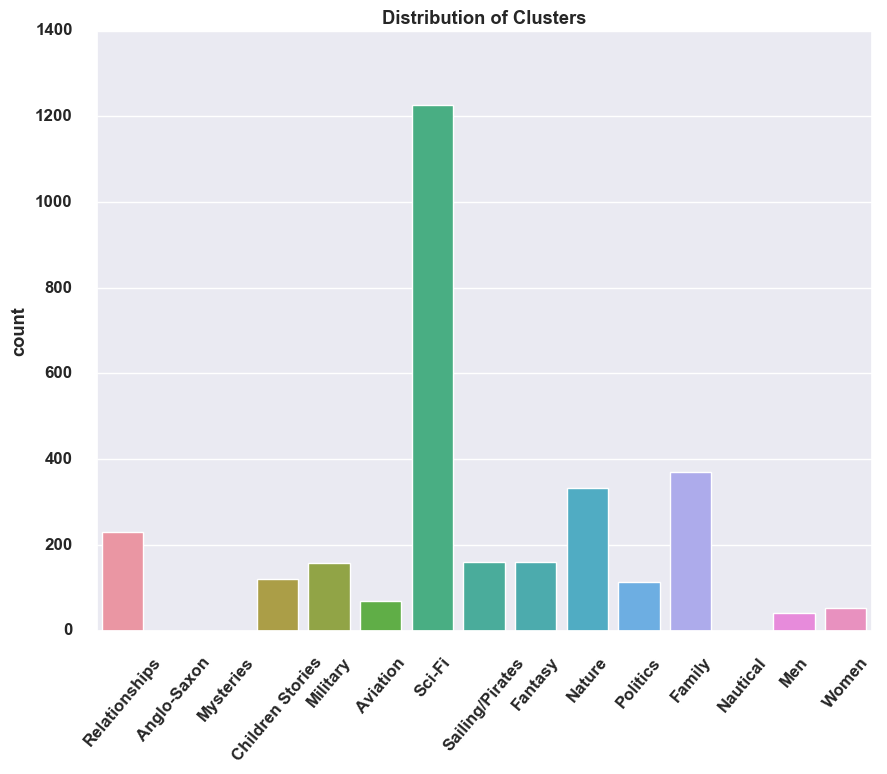

In [940]:
plt.figure(figsize=(10,7.5))
g =sns.countplot(topic_array, order = topic_names)
g.set_xticklabels(topic_names,rotation=50)
sns.set(font_scale=1.1) 
g.set_title('Distribution of Clusters')

#I screwed up the x-axis labeling, working in tableau currently

In [700]:
topic_array

['Sci-Fi',
 'Sci-Fi',
 'Sci-Fi',
 'Sailing/Pirates',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Family',
 'Family',
 'Family',
 'Sci-Fi',
 'Nature',
 'Military',
 'Nature',
 'Sci-Fi',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Nature',
 'Anglo-Saxon/Old English',
 'Sci-Fi',
 'Relationships',
 'Nature',
 'Military',
 'Nature',
 'Nature',
 'Fantasy',
 'Nature',
 'Relationships',
 'Investigations/Mysteries',
 'Investigations/Mysteries',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Sailing/Pirates',
 'Investigations/Mysteries',
 'Nature',
 'Sci-Fi',
 'Nature',
 'Investigations/Mysteries',
 'Family',
 'Nature',
 'Investigations/Mysteries',
 'Nature',
 'Family',
 'Sailing/Pirates',
 'Anglo-Saxon/Old English',
 'Sci-Fi',
 'Relationships',
 'Relationships',
 'Relationships',
 'Relationships',
 'Investigations/Mysteries',
 'Nature',
 'Relationships',
 'Family',
 'Anglo-Saxon/Old English',
 'Nature',
 'Relationships',
 'Family',
 'Relationshi

In [588]:
book_clusters.shape

(3524, 2)

In [687]:
book_clusters_upgrade = pd.merge(clusterwordsdf,
                 book_clusters,
                 on='cluster')

book_clusters_upgrade.tail(20)

,cluster,max_topic_cluster_words,max_topic_num,topic,book
3504,14,"[state, war, american, government, general, co...",10,Politics,History of the United States
3505,14,"[state, war, american, government, general, co...",10,Politics,A School History of the Great War
3506,14,"[state, war, american, government, general, co...",10,Politics,Ontario Teachers' Manuals: History
3507,14,"[state, war, american, government, general, co...",10,Politics,History of France
3508,14,"[state, war, american, government, general, co...",10,Politics,The Leading Facts of English History
3509,14,"[state, war, american, government, general, co...",10,Politics,The Beginner's American History
3510,14,"[state, war, american, government, general, co...",10,Politics,Stories of Later American History
3511,14,"[state, war, american, government, general, co...",10,Politics,The Fight for a Free Sea: A Chronicle of the W...
3512,14,"[state, war, american, government, general, co...",10,Politics,The Buccaneers in the West Indies in the XVII ...
3513,14,"[state, war, american, government, general, co...",10,Politics,The Land We Live In\nThe Story of Our Country


In [592]:
book_clusters.tail()

,book,cluster
3519,The Rat Race,9
3520,Slave Planet,1
3521,D-99,1
3522,Sentry Of The Sky,1
3523,The Troublemakers,1


### Book clusters df for dash genre:

In [834]:
pickler = open("book_clusters.pkl","wb")
pickle.dump(book_clusters, pickler)
pickler.close()

pickler = open("book_clusters_upgrade.pkl","wb")
pickle.dump(book_clusters_upgrade, pickler)
pickler.close()

pickler = open("super_df.pkl","wb")
pickle.dump(super_df, pickler)
pickler.close()

### Plotting the degree to which each book falls into each topic:

In [944]:
doctopic[:10][:10].shape

(10, 15)

In [950]:
topic_names

['Relationships',
 'Anglo-Saxon',
 'Mysteries',
 'Children Stories',
 'Military',
 'Aviation',
 'Sci-Fi',
 'Sailing/Pirates',
 'Fantasy',
 'Nature',
 'Politics',
 'Family',
 'Nautical',
 'Men',
 'Women']

In [963]:
doctopic[0][11]

0.03530908415691884

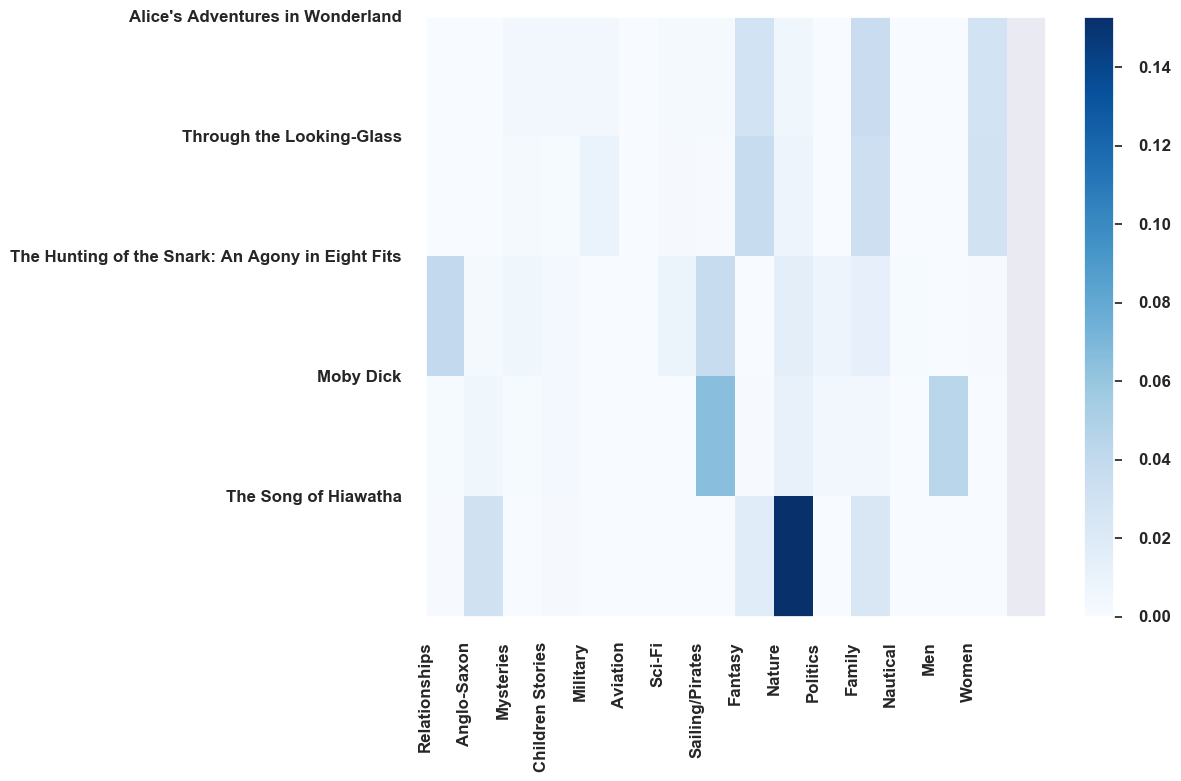

In [965]:
# increase the font size and add a title

n = 5 #documents
k = 15 #topics
books = titles[:n]
N, K = doctopic[:n][:k].shape  # N documents, K topics
topic_labels = topic_names

plt.figure(figsize=(10,7.5))

plt.pcolor(doctopic[:n][:k], norm=None, cmap='Blues')

# flip the y-axis so the texts are in descending alphabetical order
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks([y for y in range(k)],topic_names, rotation=90)
plt.yticks([y for y in range(n)],books)

# add a legend
plt.colorbar(cmap='Blues')

# fix margins

plt.show()

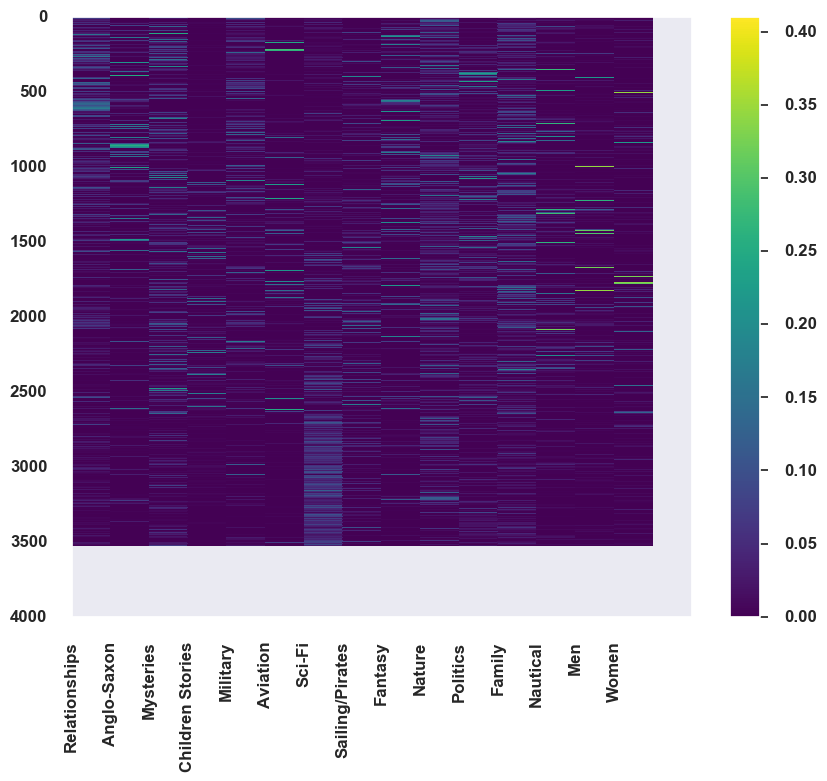

In [970]:
# increase the font size and add a title

N, K = doctopic.shape  # N documents, K topics
topic_labels = topic_names

plt.figure(figsize=(10,7.5))

plt.pcolor(doctopic, norm=None, cmap='viridis')

# flip the y-axis so the texts are in descending alphabetical order
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks([y for y in range(K)],topic_names, rotation=90)

# add a legend
plt.colorbar(cmap='viridis')

# fix margins

plt.show()

In [146]:
doctopic_prob_df = pd.DataFrame(doctopic)
doctopic_prob_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.004910,0.000000,0.039282,0.035686,0.042345,0.000000,0.023558,0.021065,0.242214,0.054413,0.000000,0.295132,0.000000,0.000000,0.241396
1,0.000000,0.000000,0.023505,0.011763,0.082169,0.000000,0.018314,0.006266,0.294852,0.065805,0.000000,0.263696,0.000000,0.000000,0.233631
2,0.287034,0.018593,0.046128,0.028158,0.000000,0.000011,0.067522,0.269887,0.000000,0.112936,0.058592,0.091386,0.011137,0.000744,0.007873
3,0.009116,0.043378,0.011056,0.028141,0.000000,0.000000,0.000000,0.450912,0.006325,0.082286,0.031136,0.034382,0.000000,0.303267,0.000000
4,0.002783,0.133515,0.000000,0.008955,0.000000,0.000000,0.000000,0.000000,0.077477,0.673177,0.000000,0.104094,0.000000,0.000000,0.000000


In [487]:
title_topic_df = pd.DataFrame()
title_topic_df['titles']= [title for title in titles]

In [490]:
title_topic_df['topic_num'] = doctopic_prob_df[:].idxmax(axis=1)

In [493]:
topic_names[(title_topic_df['topic_num'][0])]

'Family'

In [495]:
topic_names_list = []

for i in range(len(titles)):
    number = title_topic_df['topic_num'][i]
    topic_names_list.append(topic_names[number])

In [496]:
title_topic_df['max_topic'] = topic_names_list

In [503]:
pickler = open("title_topic_df.pkl","wb")
pickle.dump(title_topic_df, pickler)
pickler.close()

In [514]:
topic_names

['Relationships',
 'Anglo-Saxon/Old English',
 'Investigations/Mysteries',
 'Children Stories',
 'Military',
 'Aviation',
 'Sci-Fi',
 'Sailing/Pirates',
 'Fantasy',
 'Nature',
 'Politics',
 'Family',
 'Nautical(engines)',
 'Men',
 'Women']

In [515]:
title_topic_df[title_topic_df['max_topic']=='Sci-Fi'].head()

,titles,topic_num,max_topic
329,The Lani People,6,Sci-Fi
648,The Lord of Death and the Queen of Life,6,Sci-Fi
686,The Devolutionist and the Emancipatrix,6,Sci-Fi
746,Curiosities of the Sky,6,Sci-Fi
1268,Zarlah the Martian,6,Sci-Fi


In [519]:
#take this matrix, count the rows, make that a new datapoint
#graph barplot for each of those data points
#you can right this as a loop

topic_count = []
for topic in topic_names:    
    topic_count.append(len(title_topic_df[title_topic_df['max_topic']==topic]))

3524


In [686]:
np.sum(topic_count)

3524

In [704]:
topic_count

[249, 163, 345, 152, 166, 88, 748, 179, 177, 351, 218, 390, 139, 74, 85]

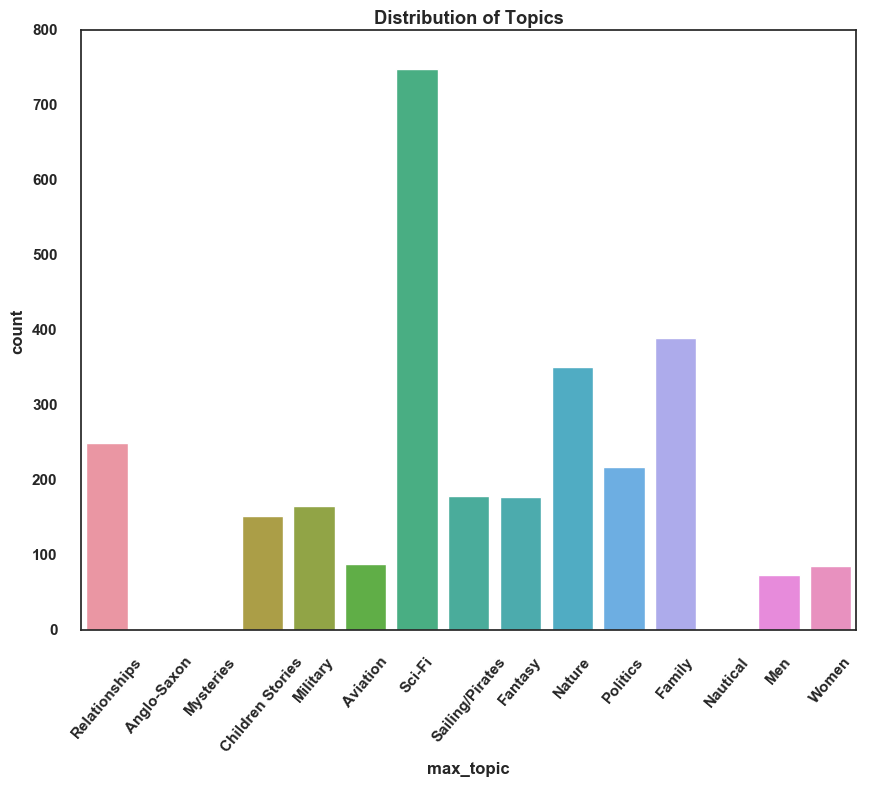

In [925]:
#plot bar graph of topics and books

plt.figure(figsize=(10,7.5))
g =sns.countplot(title_topic_df['max_topic'], order=topic_names)
g.set_xticklabels(topic_names,rotation=50)
sns.set(font_scale=1.1) 
g.set_title('Distribution of Topics')
plt.show()

In [513]:
for t in range(len(topic_words)):
    print("Topic {}: {} ({})".format(t,topic_names[t],' '.join(topic_words[t][:12])))

Topic 0: Relationships (woman love heart father friend house young god shall room madame child)
Topic 1: Anglo-Saxon/Old English (thou thy thee earl hath lord king god hast ye shall knight)
Topic 2: Investigations/Mysteries (mr miss room yes house george sir money peter gentleman paper dollar)
Topic 3: Children Stories (illustration book picture mouse cat dog robin cock bird pig frederick pussy)
Topic 4: Military (sir knight colonel ye lord horse lady officer harry shall general arthur)
Topic 5: Aviation (tom ned airship inventor harry sam scout roger swift boy mr cadet)
Topic 6: Sci-Fi (planet ship earth space room martian machine control maybe dr rocket mar)
Topic 7: Sailing/Pirates (captain ship boat sea deck vessel pirate crew island board water sail)
Topic 8: Fantasy (king prince princess queen palace son fairy sword brother majesty shall daughter)
Topic 9: Nature (water tree indian river night white mountain rock animal forest black canoe)
Topic 10: Politics (state war american g

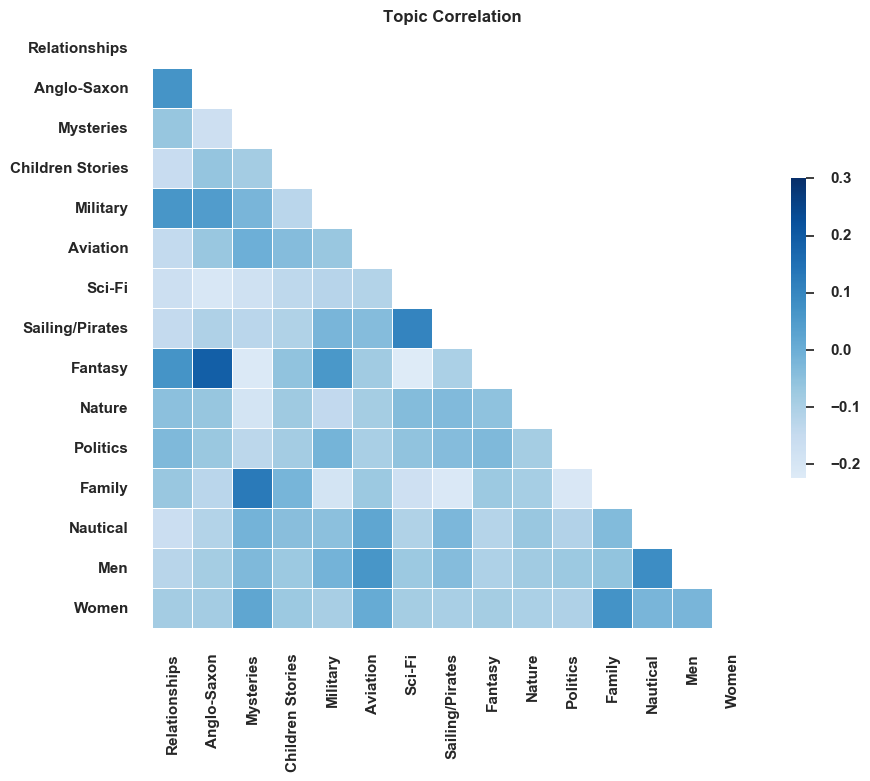

In [738]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = doctopic_prob_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7.5))

# Set color map
cmap = "Blues"
plt.title('Topic Correlation')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=topic_names,
            yticklabels=topic_names)

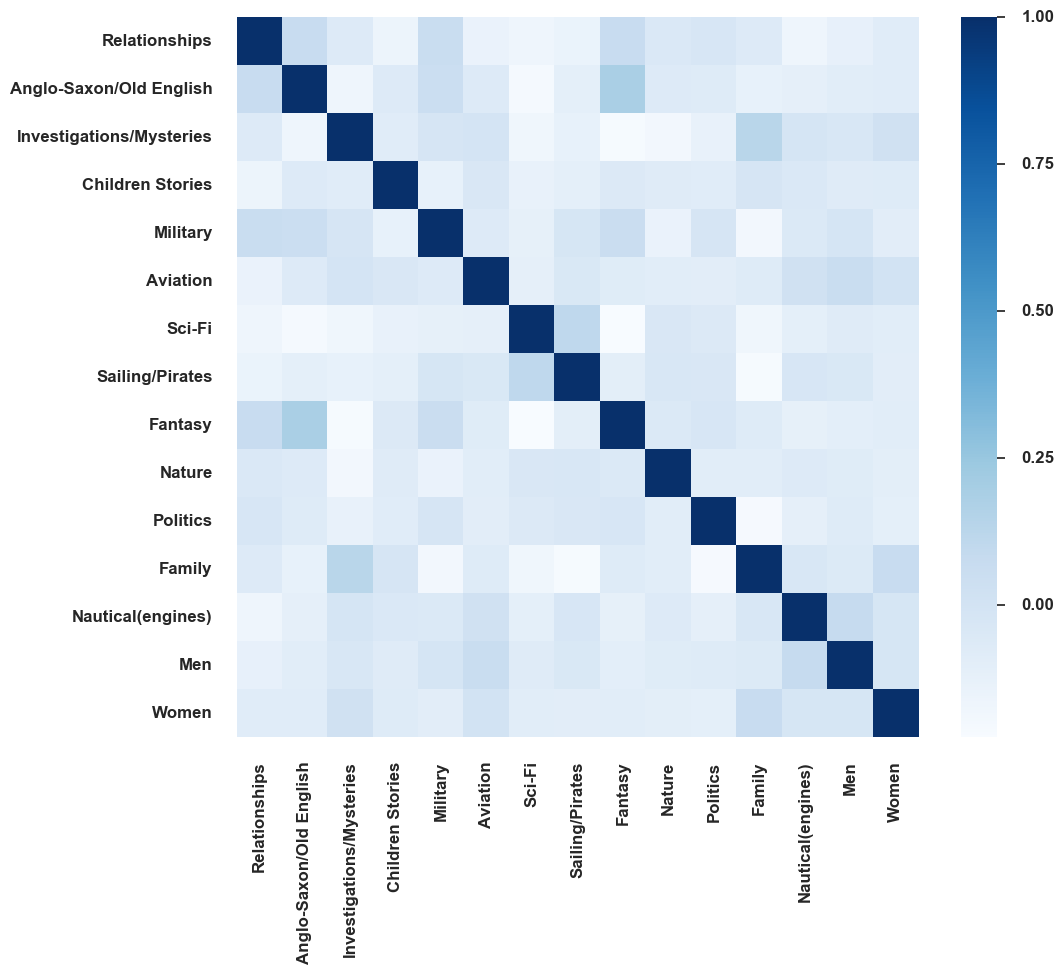

In [680]:
f, ax = plt.subplots(figsize=(11, 9))
corr = doctopic_prob_df.corr()
sns.heatmap(corr,
            xticklabels=topic_names,
            yticklabels=topic_names, 
            cmap="Blues")

In [150]:
topic_df=pd.DataFrame()
for t in range(len(topic_words)):
#     print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))
    topic_df['Topic %d' %t] = topic_words[t]
topic_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Topic 0,woman,love,heart,father,friend,house,young,god,shall,room,madame,child,moment,soul,replied,wife,night,monsieur,death,hour
Topic 1,thou,thy,thee,earl,hath,lord,king,god,hast,ye,shall,knight,thine,son,art,wilt,heart,edward,norman,father
Topic 2,mr,miss,room,yes,house,george,sir,money,peter,gentleman,paper,dollar,case,quite,replied,oh,business,dr,night,lady
Topic 3,illustration,book,picture,mouse,cat,dog,robin,cock,bird,pig,frederick,pussy,frog,coloured,london,song,peter,duck,alphabet,rabbit
Topic 4,sir,knight,colonel,ye,lord,horse,lady,officer,harry,shall,general,arthur,castle,john,french,army,gentleman,regiment,duke,troop
Topic 5,tom,ned,airship,inventor,harry,sam,scout,roger,swift,boy,mr,cadet,roy,camp,cried,motor,rover,young,big,ruth
Topic 6,planet,ship,earth,space,room,martian,machine,control,maybe,dr,rocket,mar,air,metal,car,body,human,moment,minute,screen
Topic 7,captain,ship,boat,sea,deck,vessel,pirate,crew,island,board,water,sail,officer,shore,sailor,port,lieutenant,cabin,fleet,gun
Topic 8,king,prince,princess,queen,palace,son,fairy,sword,brother,majesty,shall,daughter,castle,horse,royal,wife,knight,gold,answered,father
Topic 9,water,tree,indian,river,night,white,mountain,rock,animal,forest,black,canoe,sea,ground,bird,camp,hunter,wood,horse,lay


In [156]:
booknum = 3
norm_word_weights = [x/np.sum(word_weights[booknum]) for x in word_weights[booknum]]
# print(norm_word_weights)
# words_with_weights = zip(topic_words[booknum],norm_word_weights)
# list(words_with_weights)
words_with_weights = pd.DataFrame()
words_with_weights['words'] = topic_words[booknum]
words_with_weights['weights'] = norm_word_weights
words_with_weights.head()

,words,weights
0,illustration,0.543139
1,book,0.044811
2,picture,0.037661
3,mouse,0.036140
4,cat,0.028286


### TSNE on doctopics

In [199]:
from sklearn.manifold import TSNE
#eculidean because I think we care how much the topic is weighted, not just which topics are mentioned
tsne = TSNE(n_components=2, learning_rate=15.0, perplexity = 15.0, n_iter = 1500, n_iter_without_progress = 100, init='pca', random_state=42, metric='euclidean')
X_tsne = tsne.fit_transform(doctopic)

In [836]:
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [838]:
X_tsne.T.shape

(2, 3524)

ValueError: Image size of 120970x100838 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x1000 with 1 Axes>

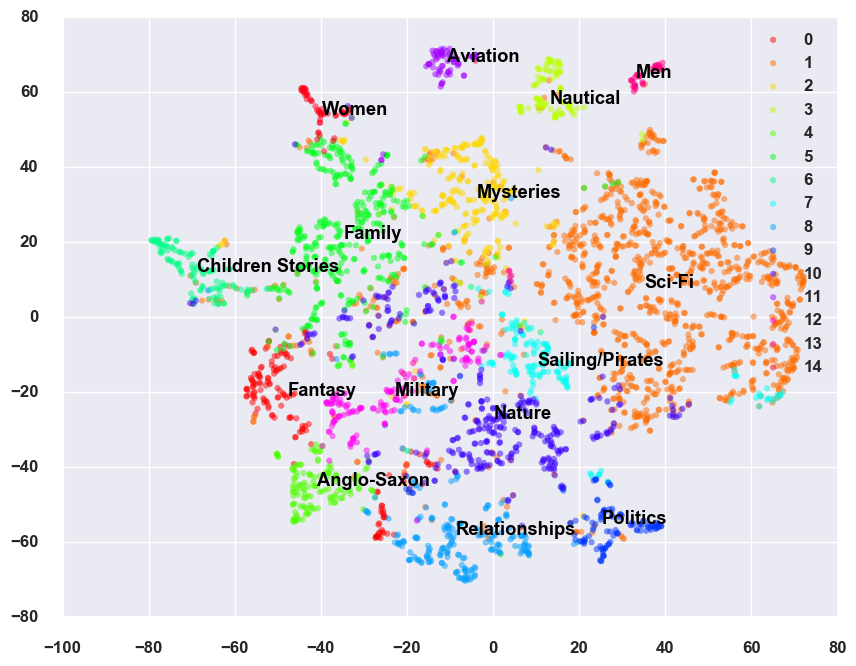

In [938]:
# Make relevant dataframes

data = pd.DataFrame()
data['x'] = X_tsne.T[0]
data['y'] = X_tsne.T[1]
data['labels'] = clusters

median_cluster_location = data.groupby(['labels']).median().reset_index()
median_cluster_location['x'] = median_cluster_location.x.astype(int)
median_cluster_location['y'] = median_cluster_location.y.astype(int)
median_cluster_location['labels'] = cluster_names

# #Visualize the data
# plt.figure(figsize=(12, 12))
# plt.scatter(X_tsne.T[0],X_tsne.T[1],c=list(clusters),label=set(list(clusters)))
# add annotations one by one with a loop
for line in range(0, median_cluster_location.shape[0]):
#     print(line)
    plt.text(median_cluster_location.x[line]+0.2, median_cluster_location.y[line], median_cluster_location.labels[line],
                   horizontalalignment='left', size='medium', color='black', weight='semibold')
    
#Visualize the data

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(len(set(clusters)))
fig, ax = plt.subplots(figsize=(10, 7.5))

for cluster in set(clusters):
    plotdata=data[data['labels']==cluster]
    x, y = plotdata['x'], plotdata['y']
    ax.scatter(x, y, c=cmap(cluster), label=cluster, alpha=0.5, edgecolors='none')

# add annotations one by one with a loop    
for line in range(0, median_cluster_location.shape[0]):
    ax.text(median_cluster_location.x[line]+0.2, median_cluster_location.y[line], median_cluster_location.labels[line],
                   horizontalalignment='left', size='medium', color='black', weight='semibold')

ax.legend()
# ax.grid(True)


### Source for some of this code:
- https://de.dariah.eu/
- https://de.dariah.eu/tatom/topic_model_python.html
- https://de.dariah.eu/tatom/topic_model_visualization.html#topic-model-visualization
- https://github.com/Jack-Etheredge/Project-guten-bag-of-words